In [1]:
#%matplotlib inline 
%matplotlib notebook
import numpy as np

#ccPercentage
ccPercentage = 0.1523019480718742
#ethPriceSum in ETH
ethPriceSum  = 70000

ccPriceSum = ethPriceSum * (0.1523019480718742/100)

print("Carbon Credits Total(ETH):{}".format(ccPriceSum))

print("Total Ethereums:{}".format(ethPriceSum))

#Consider generating random numbers between that match promotios per ethereum that we got to reach our goal:
promo = [300,275,250,225]
DTSlst = np.random.randint(0, 4, int(ethPriceSum))
DTSlst = np.array(list(map(lambda x: promo[x], DTSlst)))

#total supply per ethereums + decas to contract owner
DTS = 1.025* DTSlst.sum()
print("DECAS Total Supply:{}".format(DTS))

#Price Per Deca in ETH
PPD = (ccPriceSum + ethPriceSum) / DTS
print("Price per Deca:{}".format(PPD))

#Verification Code:
assert (ethPriceSum+ccPriceSum==PPD*DTS), "Error in verification"
print('{0}={1}'.format(ethPriceSum+ccPriceSum,PPD*DTS))

Carbon Credits Total(ETH):106.61136365031194
Total Ethereums:70000
DECAS Total Supply:18840191.875
Price per Deca:0.0037211198181414653
70106.61136365031=70106.61136365031


In [2]:
import matplotlib.pyplot as plt
#the pie chart
fig, ax = plt.subplots(figsize=(9, 4.5), subplot_kw=dict(aspect="equal"))

commodities = ["{} Carbon_Credits".format(ccPriceSum),
          "{} Ethereum".format(ethPriceSum)]

data = [float(x.split()[0]) for x in commodities]
backup = [x.split()[-1] for x in commodities]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} ETH)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, backup,
          title="DECAs Backup",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")
ax.set_title("DECA: Commodities")
plt.show()

<IPython.core.display.Javascript object>

In [3]:
from IPython.display import display, HTML
import sys, os
sys.path.append(os.path.abspath('..'))
from fix42D import fix42D
import pandas as pd

#create the DataFrame
preICOStart = '07-01-2020' #MM-DD-YYYY
days = 77
dRan1 = pd.date_range(start = preICOStart, periods = days) 

#77 days dataframe
df = pd.DataFrame(dRan1)
df = df.rename(columns={0: "dates"})
#df = df.set_index('dates', drop = True) 

#Total DECAS by Day (bought) 
df1 = pd.DataFrame(fix42D(days,DTSlst))
df1 = df1.sum(axis=1)
df1 = df1.to_frame(name = 'TotalDecasByDay')

#Total Ethereums by Day (invested)
ETHlst = np.ones(int(ethPriceSum))
df2 = pd.DataFrame(fix42D(days,ETHlst))
df2 = df2.sum(axis=1)
df2 = df2.to_frame(name = 'TotalETHByDay')

#concat the dataframes
result = pd.concat([df, df1, df2], axis=1, sort=False)
#Deca Total Supply by day
result['DecaTotalSupply'] = 0
for i in range(days):
    result.loc[i,'DecaTotalSupply'] = result.loc[:i,'TotalDecasByDay'].sum() * 1.025
#Ethereum Total Supply by day
result['EthereumTotalSupply'] = 0
for i in range(days):
    result.loc[i,'EthereumTotalSupply'] = result.loc[:i,'TotalETHByDay'].sum()
#carbon Credits backup
result['ccPriceSum(ETH)'] = ccPriceSum
#Price Per Deca in Ethereum
# based on price formula  PPD(ETH) = (ccPriceSum + ethPriceSum) / DTS
result['DECAPrice(ETH)'] = 0
for i in range(days):
    result.loc[i,'DECAPrice(ETH)'] = (result.loc[i,'ccPriceSum(ETH)'] 
                                 + result.loc[i,'EthereumTotalSupply']) / result.loc[i,'DecaTotalSupply']
# LOWEST Price Per Deca
# based on price formula  PPD = (ccPriceSum) / DTS
result['DECALowestPrice(ETH)'] = 0
for i in range(days):
    result.loc[i,'DECALowestPrice(ETH)'] = (result.loc[i,'ccPriceSum(ETH)']) / result.loc[i,'DecaTotalSupply']
    
# Percentage Backup
# based on PBCK = ( DECALowestPrice / DECAPrice) * 100
result['PercentageBackUp'] = 0
for i in range(days):
    result.loc[i,'PercentageBackUp'] = (result.loc[i,'DECALowestPrice(ETH)'] / result.loc[i,'DECAPrice(ETH)']) * 100


In [4]:
result2 = result.rename(columns={'TotalDecasByDay': 'Total DECA Per Day', 'TotalETHByDay': 'Total ETH Per Day',
                                'DecaTotalSupply': 'DTS',
                                'EthereumTotalSupply': 'ETHTS',
                                'ccPriceSum(ETH)': 'CCTS',
                                'DECAPrice(ETH)': 'DECA Price(ETH)',
                                'DECALowestPrice(ETH)': 'DECA Lowest Price (ETH)',
                                'PercentageBackUp': 'CC Percentage Backup (%)'})
result2 = result2.set_index('dates', drop = True) 
display(result2)
finalDF1Fix = result2[['CC Percentage Backup (%)', 'DECA Lowest Price (ETH)', 'DECA Price(ETH)']]
display(finalDF1Fix)

Total DECA Per Day  Total ETH Per Day           DTS    ETHTS  \
dates                                                                      
2020-07-01              238825              910.0  2.447956e+05    910.0   
2020-07-02              239100              910.0  4.898731e+05   1820.0   
2020-07-03              240350              910.0  7.362319e+05   2730.0   
2020-07-04              239525              910.0  9.817450e+05   3640.0   
2020-07-05              238550              910.0  1.226259e+06   4550.0   
...                        ...                ...           ...      ...   
2020-09-11              239725              910.0  1.787636e+07  66430.0   
2020-09-12              240300              910.0  1.812267e+07  67340.0   
2020-09-13              239050              910.0  1.836769e+07  68250.0   
2020-09-14              239350              910.0  1.861303e+07  69160.0   
2020-09-15              221625              840.0  1.884019e+07  70000.0   

                  CCTS  DECA Price(ETH)  DECA Lowest Price (ETH)  \
dates                                                              
2020-07-01  106.611364         0.004153                 0.000436   
2020-07-02  106.611364         0.003933                 0.000218   
2020-07-03  106.611364         0.003853                 0.000145   
2020-07-04  106.611364         0.003816                 0.000109   
2020-07-05  106.611364         0.003797                 0.000087   
...                ...              ...                      ...   
2020-09-11  106.611364         0.003722                 0.000006   
2020-09-12  106.611364         0.003722                 0.000006   
2020-09-13  106.611364         0.003722                 0.000006   
2020-09-14  106.611364         0.003721                 0.000006   
2020-09-15  106.611364         0.003721                 0.000006   

            CC Percentage Backup (%)  
dates                                 
2020-07-01                 10.486934  
2020-07-02                  5.533621  
2020-07-03                  3.758406  
2020-07-04                  2.845541  
2020-07-05                  2.289462  
...                              ...  
2020-09-11                  0.160230  
2020-09-12                  0.158068  
2020-09-13                  0.155964  
2020-09-14                  0.153915  
2020-09-15                  0.152070  

[77 rows x 8 columns]

CC Percentage Backup (%)  DECA Lowest Price (ETH)  DECA Price(ETH)
dates                                                                         
2020-07-01                 10.486934                 0.000436         0.004153
2020-07-02                  5.533621                 0.000218         0.003933
2020-07-03                  3.758406                 0.000145         0.003853
2020-07-04                  2.845541                 0.000109         0.003816
2020-07-05                  2.289462                 0.000087         0.003797
...                              ...                      ...              ...
2020-09-11                  0.160230                 0.000006         0.003722
2020-09-12                  0.158068                 0.000006         0.003722
2020-09-13                  0.155964                 0.000006         0.003722
2020-09-14                  0.153915                 0.000006         0.003721
2020-09-15                  0.152070                 0.000006         0.003721

[77 rows x 3 columns]

<IPython.core.display.Javascript object>


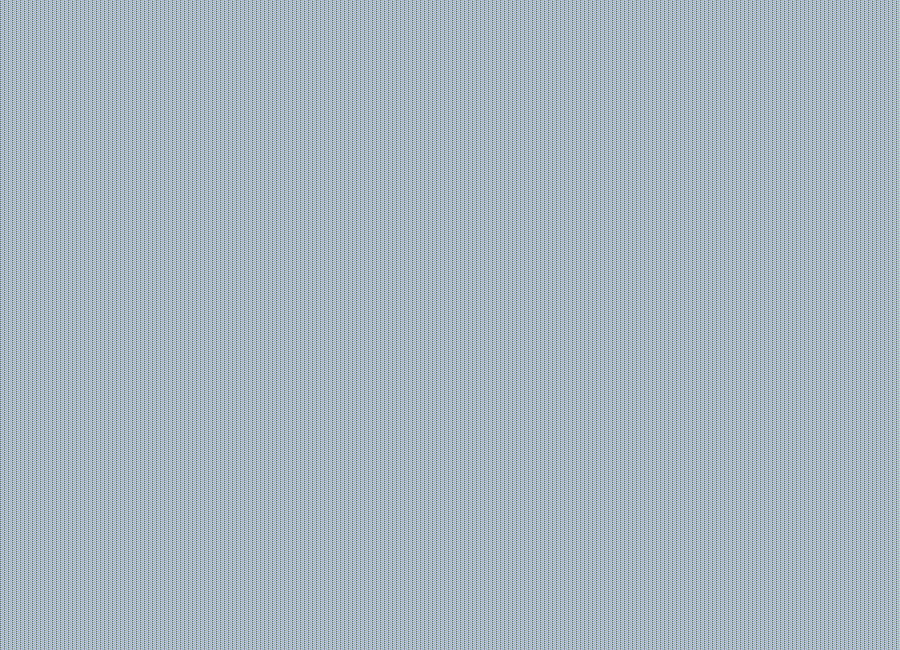

In [5]:
 
#plot Percentage Backup
#get the important cols
finalDF1 = result[['dates','PercentageBackUp', 'DECALowestPrice(ETH)', 'DECAPrice(ETH)']]
finalDF1 = finalDF1.set_index('dates', drop = True) 

#prepare chart
fig, ax = plt.subplots(figsize=(9, 6.5))
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.20))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

finalDF1['PercentageBackUp'].plot(ax=ax, style='b-')
# same ax as above since it's automatically added on the right
finalDF1['DECALowestPrice(ETH)'].plot(ax=ax, style='r-', secondary_y=True)
finalDF1['DECAPrice(ETH)'].plot(ax=ax3, style='g-')

#Set Y Axis Limits
ax.set_ylim([0,100]) #Percentage backup
ax3.set_ylim([0,finalDF1['DECAPrice(ETH)'].max()*1.1]) #DECAPrice
ax.right_ax.set_ylim([0,finalDF1['DECAPrice(ETH)'].max()/10]) #DecaLowestPrice

#set Y Labels:
ax.set_ylabel('CC Percentage Backup (%)', fontsize='medium') #Percentage backup
ax3.set_ylabel('DECA Price (ETH)', fontsize='medium') #DECAPrice
ax.right_ax.set_ylabel('DECA Lowest Price (ETH)', fontsize='medium') #DecaLowestPrice

# add legend --> take advantage of pandas providing us access
# to the line associated with the right part of the axis
ax3.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0], ax3.get_lines()[0]],\
           ['CC Percentage Backup (%)','DECA Lowest Price (ETH)','DECA Price(ETH)'],loc = 'upper center', bbox_to_anchor=(0.5, 1.0))
#finalDF1.plot()

In [6]:
### Extension proposal for next 3 years
### 3 times 365 +1
daysToAdd = 1096

#create the DataFrame Days
#get the last day
ICOEnds = dRan1[[-1]].strftime("%m-%d-%Y")
dRan2 = pd.date_range(start = ICOEnds[0], periods = daysToAdd) 
#remove first day which is preICOEnds
dRan2 = dRan2[1:]
df4 = pd.DataFrame(dRan2)
df4 = df4.rename(columns={0: "dates"})

#AfterICOStartDate first day
AfterICOStarts = dRan2[[0]].strftime("%m-%d-%Y")

#take the last Deca Total Supply since there won't be more
df4['DecaTotalSupply'] = result.loc[len(result) -1 ,'DecaTotalSupply']
#take the last Ethereum Total Supply since there won't be more
df4['EthereumTotalSupply'] = result.loc[len(result) -1 ,'EthereumTotalSupply']
#define dates and % backup and EthereumPrice list for buying and canceling carbon credits
dates = [[AfterICOStarts[0],0 ,1],
         ['04-23-2021', 5, 1], # each 219 days...
         ['11-28-2021', 10, 1],
         ['07-05-2022', 15, 1],
         ['02-09-2023', 20, 1]]
'''
    we write multiple whiles for each column calculation to make it easier to understand.
'''

#import pdb; pdb.set_trace()
#while for getting percentages as bought and cc cancelation:
df4['ccPriceSum(ETH)'] = ccPriceSum
#percent variable for debug
#df4['percent'] = 0
#each day
i = 0
#each date from dates list
date = 0
while i < (daysToAdd - 1):
    #get the current day
    currentDay = df4.loc[i,'dates'].strftime("%m-%d-%Y")
    #if the day is a define date, add the price and change to next date data
    if currentDay == dates[date][0]:
        #first we buy and cancel carbon credits with the current Ethereum Price
        df4.loc[i,'ccPriceSum(ETH)'] +=  df4.loc[i,'EthereumTotalSupply'] * (dates[date][1]/100)
        #then we take out the percentage from eth and update the eth supply
        df4.loc[i,'EthereumTotalSupply'] = df4.loc[i,'EthereumTotalSupply'] * (1 - dates[date][1]/100)
        #df4.loc[i,'percent'] = dates[date][1]
        if date <= len(dates[0]):
            date+=1
        i+=1
    else:
        #Keep Last Change Price bought
        df4.loc[i,'ccPriceSum(ETH)'] =  df4.loc[i-1,'ccPriceSum(ETH)']
        #Keep Last Change
        df4.loc[i,'EthereumTotalSupply'] = df4.loc[i-1,'EthereumTotalSupply']
        i+=1

#Price Per Deca
# based on price formula  PPD (ETH) = (ccPriceSum + ethPriceSum) / DTS
df4['DECAPrice(ETH)'] = 0
for i in range(daysToAdd-1):
    df4.loc[i,'DECAPrice(ETH)'] = (df4.loc[i,'ccPriceSum(ETH)'] 
                                 + df4.loc[i,'EthereumTotalSupply'] ) / df4.loc[i,'DecaTotalSupply']
# LOWEST Price Per Deca
# based on price formula  PPD = (ccPriceSum) / DTS
df4['DECALowestPrice(ETH)'] = 0
for i in range(daysToAdd-1):
    df4.loc[i,'DECALowestPrice(ETH)'] = (df4.loc[i,'ccPriceSum(ETH)']) / df4.loc[i,'DecaTotalSupply']
    
# Percentage Backup
# based on PBCK = ( DECALowestPrice / DECAPrice) * 100
df4['PercentageBackUp'] = 0
for i in range(daysToAdd-1):
    df4.loc[i,'PercentageBackUp'] = (df4.loc[i,'DECALowestPrice(ETH)'] / df4.loc[i,'DECAPrice(ETH)']) * 100        
        

#debug changes in cc and %
'''
display(df4.loc[0])
print('---------------------------------------------------------------------------------')
display(df4.loc[218])
display(df4.loc[219])
display(df4.loc[220])
print('---------------------------------------------------------------------------------')
display(df4.loc[439])
display(df4.loc[440])
display(df4.loc[441])
print('---------------------------------------------------------------------------------')
display(df4.loc[1094])
'''
#carbon Credits backup
#df4['ccPriceSum'] = ccPriceSum
display(df4)


dates  DecaTotalSupply  EthereumTotalSupply  ccPriceSum(ETH)  \
0    2020-09-16     1.884019e+07              70000.0       106.611364   
1    2020-09-17     1.884019e+07              70000.0       106.611364   
2    2020-09-18     1.884019e+07              70000.0       106.611364   
3    2020-09-19     1.884019e+07              70000.0       106.611364   
4    2020-09-20     1.884019e+07              70000.0       106.611364   
...         ...              ...                  ...              ...   
1090 2023-09-11     1.884019e+07              56000.0     14106.611364   
1091 2023-09-12     1.884019e+07              56000.0     14106.611364   
1092 2023-09-13     1.884019e+07              56000.0     14106.611364   
1093 2023-09-14     1.884019e+07              56000.0     14106.611364   
1094 2023-09-15     1.884019e+07              56000.0     14106.611364   

      DECAPrice(ETH)  DECALowestPrice(ETH)  PercentageBackUp  
0           0.003721              0.000006          0.152070  
1           0.003721              0.000006          0.152070  
2           0.003721              0.000006          0.152070  
3           0.003721              0.000006          0.152070  
4           0.003721              0.000006          0.152070  
...              ...                   ...               ...  
1090        0.003721              0.000749         20.121656  
1091        0.003721              0.000749         20.121656  
1092        0.003721              0.000749         20.121656  
1093        0.003721              0.000749         20.121656  
1094        0.003721              0.000749         20.121656  

[1095 rows x 7 columns]

In [7]:
#join the ICO with the 3 years development.
resultICO = result[['dates','DecaTotalSupply','EthereumTotalSupply','ccPriceSum(ETH)','DECAPrice(ETH)','DECALowestPrice(ETH)','PercentageBackUp']]
df4 = df4[['dates','DecaTotalSupply','EthereumTotalSupply','ccPriceSum(ETH)','DECAPrice(ETH)','DECALowestPrice(ETH)','PercentageBackUp']]
resultFull = pd.concat([resultICO, df4], axis=0, sort=False)
display(resultFull)

dates  DecaTotalSupply  EthereumTotalSupply  ccPriceSum(ETH)  \
0    2020-07-01     2.447956e+05                910.0       106.611364   
1    2020-07-02     4.898731e+05               1820.0       106.611364   
2    2020-07-03     7.362319e+05               2730.0       106.611364   
3    2020-07-04     9.817450e+05               3640.0       106.611364   
4    2020-07-05     1.226259e+06               4550.0       106.611364   
...         ...              ...                  ...              ...   
1090 2023-09-11     1.884019e+07              56000.0     14106.611364   
1091 2023-09-12     1.884019e+07              56000.0     14106.611364   
1092 2023-09-13     1.884019e+07              56000.0     14106.611364   
1093 2023-09-14     1.884019e+07              56000.0     14106.611364   
1094 2023-09-15     1.884019e+07              56000.0     14106.611364   

      DECAPrice(ETH)  DECALowestPrice(ETH)  PercentageBackUp  
0           0.004153              0.000436         10.486934  
1           0.003933              0.000218          5.533621  
2           0.003853              0.000145          3.758406  
3           0.003816              0.000109          2.845541  
4           0.003797              0.000087          2.289462  
...              ...                   ...               ...  
1090        0.003721              0.000749         20.121656  
1091        0.003721              0.000749         20.121656  
1092        0.003721              0.000749         20.121656  
1093        0.003721              0.000749         20.121656  
1094        0.003721              0.000749         20.121656  

[1172 rows x 7 columns]

In [8]:
resultFull2 = resultFull.rename(columns={'DecaTotalSupply': 'DTS',
                                'EthereumTotalSupply': 'ETHTS',
                                'ccPriceSum(ETH)': 'CCTS',
                                'DECAPrice(ETH)': 'DECA Price(ETH)',
                                'DECALowestPrice(ETH)': 'DECA Lowest Price (ETH)',
                                'PercentageBackUp': 'CC Percentage Backup (%)'})
resultFull2 = resultFull2.set_index('dates', drop = True) 
display(resultFull2)
finalDF2Fix = resultFull2[['CC Percentage Backup (%)', 'DECA Lowest Price (ETH)', 'DECA Price(ETH)']]
display(finalDF2Fix)

DTS    ETHTS          CCTS  DECA Price(ETH)  \
dates                                                              
2020-07-01  2.447956e+05    910.0    106.611364         0.004153   
2020-07-02  4.898731e+05   1820.0    106.611364         0.003933   
2020-07-03  7.362319e+05   2730.0    106.611364         0.003853   
2020-07-04  9.817450e+05   3640.0    106.611364         0.003816   
2020-07-05  1.226259e+06   4550.0    106.611364         0.003797   
...                  ...      ...           ...              ...   
2023-09-11  1.884019e+07  56000.0  14106.611364         0.003721   
2023-09-12  1.884019e+07  56000.0  14106.611364         0.003721   
2023-09-13  1.884019e+07  56000.0  14106.611364         0.003721   
2023-09-14  1.884019e+07  56000.0  14106.611364         0.003721   
2023-09-15  1.884019e+07  56000.0  14106.611364         0.003721   

            DECA Lowest Price (ETH)  CC Percentage Backup (%)  
dates                                                          
2020-07-01                 0.000436                 10.486934  
2020-07-02                 0.000218                  5.533621  
2020-07-03                 0.000145                  3.758406  
2020-07-04                 0.000109                  2.845541  
2020-07-05                 0.000087                  2.289462  
...                             ...                       ...  
2023-09-11                 0.000749                 20.121656  
2023-09-12                 0.000749                 20.121656  
2023-09-13                 0.000749                 20.121656  
2023-09-14                 0.000749                 20.121656  
2023-09-15                 0.000749                 20.121656  

[1172 rows x 6 columns]

CC Percentage Backup (%)  DECA Lowest Price (ETH)  DECA Price(ETH)
dates                                                                         
2020-07-01                 10.486934                 0.000436         0.004153
2020-07-02                  5.533621                 0.000218         0.003933
2020-07-03                  3.758406                 0.000145         0.003853
2020-07-04                  2.845541                 0.000109         0.003816
2020-07-05                  2.289462                 0.000087         0.003797
...                              ...                      ...              ...
2023-09-11                 20.121656                 0.000749         0.003721
2023-09-12                 20.121656                 0.000749         0.003721
2023-09-13                 20.121656                 0.000749         0.003721
2023-09-14                 20.121656                 0.000749         0.003721
2023-09-15                 20.121656                 0.000749         0.003721

[1172 rows x 3 columns]

<IPython.core.display.Javascript object>


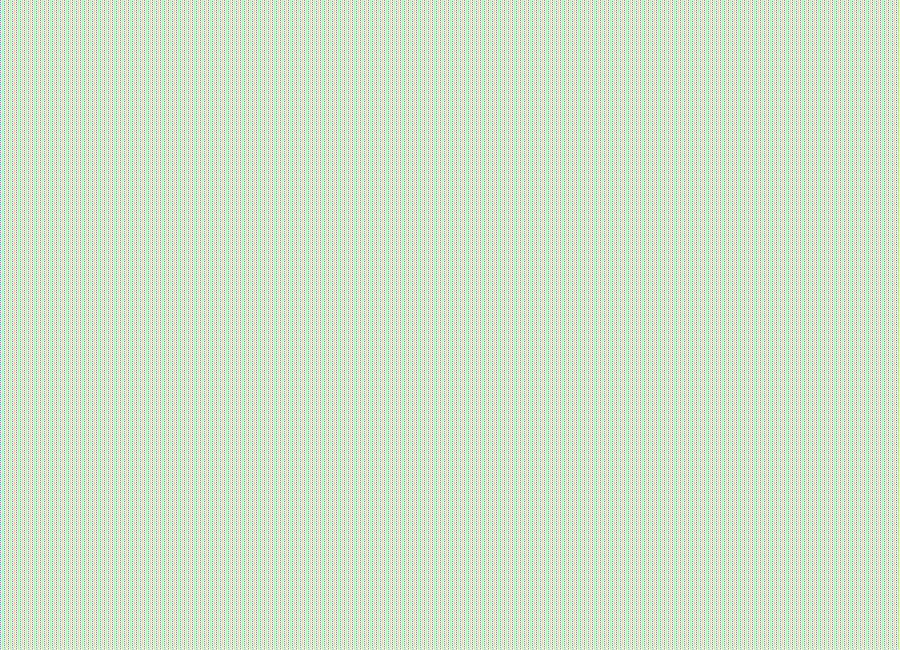

In [9]:
#plot Percentage Backup
#get the important cols
finalDF2 = resultFull[['dates','PercentageBackUp', 'DECALowestPrice(ETH)', 'DECAPrice(ETH)']]
finalDF2 = finalDF2.set_index('dates', drop = True) 

#prepare chart
fig, ax = plt.subplots(figsize=(9, 6.5))
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.20))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

finalDF2['PercentageBackUp'].plot(ax=ax, style='b-')
# same ax as above since it's automatically added on the right
finalDF2['DECALowestPrice(ETH)'].plot(ax=ax, style='r-', secondary_y=True)
finalDF2['DECAPrice(ETH)'].plot(ax=ax3, style='g-')

#Set Y Axis Limits
ax.set_ylim([0,100]) #Percentage backup
ax3.set_ylim([0,finalDF2['DECAPrice(ETH)'].max()*1.1]) #DECAPrice
ax.right_ax.set_ylim([0,finalDF2['DECAPrice(ETH)'].max()/2]) #DecaLowestPrice
#set Y Labels:
ax.set_ylabel('CC Percentage Backup (%)', fontsize='medium') #Percentage backup
ax3.set_ylabel('DECA Price (ETH)', fontsize='medium') #DECAPrice
ax.right_ax.set_ylabel('DECA Lowest Price (ETH)', fontsize='medium') #DecaLowestPrice

# add legend --> take advantage of pandas providing us access
# to the line associated with the right part of the axis
ax3.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0], ax3.get_lines()[0]],\
           ['CC Percentage Backup (%)','DECA Lowest Price (ETH)','DECA Price(ETH)'],loc = 'upper center', bbox_to_anchor=(0.5, 1.0))
#finalDF2.plot()